# Plotting Trajectory of a Sattelite using Runge Kutta 2 Algorithm

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

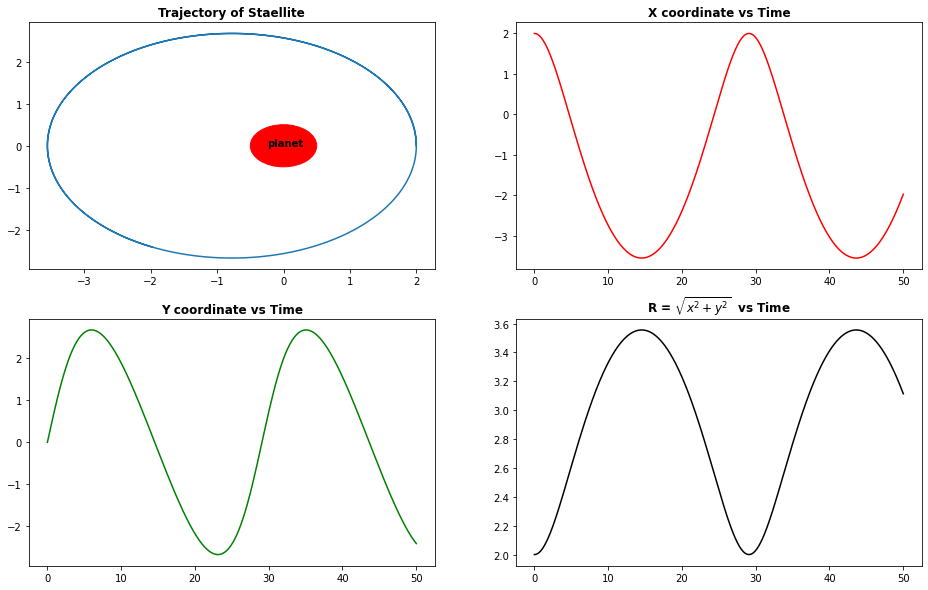

In [1]:
import numpy as np
from vpython import*
import matplotlib.pyplot as plt


def slope(x1,y1,co8):  ## this is the slope of velocity i.e. acceleration.
    ## I am giving the co8 to use it for both  x and y coordinate
    
    
    r_3x = (x1**2+y1**2)**1.5  
    if(co8==0):  ##it will return slope for v_x
        
        return -1.*x1/(r_3x);
    else :
        return -1.*y1/(r_3x);  ##it will return slope for v_x
    
    
######initializing
##x coordinates
x  = 2
v_x  = 0
##y coordinates
y = 0
v_y = 0.8
##relative separation
r = np.sqrt(x**2+y**2)

R_M = 0.5 ##radius of planet 2 i.e. dimensionless ofcourse  
R_m  =  0.2     ##radius of planet 1

t = 0  ##initial time
dt = 0.01  ##time increment


###Lists for storing positions and time
X = [x]
Y = [y]
T = [t]


################


#########VPYTHON CODE for visulization
canvas(background=color.white,eight=600,width=900)

planet1 = sphere(pos = vector(0,0,0),radius = R_M,color = color.red)
planet2 =  sphere(pos = vector(x,y,0),radius = R_m,color = color.cyan, make_trail=True,trail_color = color.black)
# e = 0.5*(v_x**2+v_y**2)-(1.0/r)
# E = [e]
while(t<=50):
    rate(300)
    kvx = dt*slope((x+0.5*dt*v_x),(y+0.5*dt*v_y),0)  ##this is dt*(slope of v_x at midpoint) (ps-Carefully observe values in parentheses)
    kvy = dt*slope((x+0.5*dt*v_x),(y+0.5*dt*v_y),1) ## this is  dt*(slope of v_y at midpoint) 
    ##note that in upper two lines none of four quantities (x,y,vx,vy) has been updated  !!
    
    kx = dt*(v_x+ 0.5*dt*slope(x,y,0))  ## it is dt*(V_x at midpoint)
    ky = dt*(v_y+ 0.5*dt*slope(x,y,1))  ## it is dt*(V_y at midpoint)
    
    x = x+kx   ##updating x
    y = y+ky    ##updating y
    
    v_x  = v_x +kvx  ##updating v_x
    v_y  = v_y +kvy  ##updating v_y
    
    t+= dt  ##updating time

    planet2.pos.x = x  ##updating vpython spheres
    planet2.pos.y = y  
    X.append(x)  ###updating lists
    Y.append(y)
    T.append(t)  

    if(np.sqrt(x**2+y**2)<R_M+R_m):  ##stopping the loop when two planets surfaces touch each other
        break;
        
    #plotting The trajectory on matplotlib and R vs T
#from matplotlib import style
from matplotlib import patches as pt  ##importing patches to represent planet

X = np.array(X)  ##converting lists to numpy array ,cuz they are easy to handle
Y = np.array(Y)
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2,ncols= 2,figsize = (16,10))
pt = pt.Circle((0,0),radius = R_M,color = 'r')  ##planet patch
ax1.add_patch(pt)
ax1.plot(X,Y )##plotting the trajectory 
ax1.set_title('Trajectory of Staellite',fontweight='bold')
ax1.text(-0.25,0,'planet',fontweight='bold')

#Plotting positins vs Time
ax2.set_title('X coordinate vs Time',fontweight='bold')
ax2.plot(T,X,'r')
              
ax3.set_title('Y coordinate vs Time',fontweight='bold')
ax3.plot(T,Y,'g')
              
ax4.set_title(r'R = $\sqrt{x^2+y^2}$  vs Time',fontweight='bold')
R = (X**2+Y**2)**0.5
ax4.plot(T,R,'k')

plt.show() 